In [1]:
import matplotlib.pyplot as plt
from fastquant import get_stock_data
import numpy as np


In [32]:
import pandas as pd

In [30]:
res

<Response [200]>

In [2]:
# stock dic
# stock_dic = ['TSLA', 'AAPL', ]
zgg = {}
zgg_code = ['BILI', 'BABA', 'BIDU']
for name in zgg_code:
    zgg[name] = get_stock_data(name, "2020-01-01", "2020-12-31")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [27]:
#!/user/bin/env python
# coding:utf-8

import selenium
from selenium import webdriver

start_link = 'http://www.aastocks.com/tc/ipo/ListedIPO.aspx'
phantomjs_path = '/home/guan/Software/phantomjs-2.1.1-linux-x86_64/bin/phantomjs'

def get_sotcks_info(ds, outfile):
    stocks = ds.find_elements_by_xpath('//tr[@class="DR" or @class="ADR"]')
    for stock in stocks:
        strtmp = ''
        for element in stock.find_elements_by_xpath('.//td'):
            strtmp += '\t' + element.text.strip('"').strip()
        print (strtmp)
        print >> outfile, strtmp.strip().encode('utf-8')
    return 0

def crawl_hk_ipo():
    outfile = open('./data/ipo_list.txt', 'w')
    header = 'date' + '\t' + 'code' + '\t' + 'name' + '\t' + 'category' + '\t' + 'ipo_price' + '\t' + 'buy_ratio' + '\t' + 'one_hand' + '\t' + 'draw_prob' + '\t' + 'firstday_performance' + '\t' + 'now_price' + '\t' + 'total_performance'
    print (outfile, header.encode('utf-8'))
    ds = webdriver.PhantomJS(executable_path=phantomjs_path)
    ds.implicitly_wait(10)
    ds.set_page_load_timeout(10)
    ds.maximize_window()
    crawl_finish = 0
    ds.get(start_link)

    while crawl_finish == 0:
        cur_page_num = str(ds.find_element_by_xpath('//div[@class="paging_cur"]').text)
        cur_page_num = int(cur_page_num)
        print ('Crawling page ' + str(cur_page_num))
        get_sotcks_info(ds, outfile)
       
        try:
            cur_page_num += 1
            next_page_button = ds.find_element_by_xpath('//a[@href="javascript:searchPage('+ str(cur_page_num) + ')"]')
            next_page_button.click()
        except Exception as e:
            #print str(e)
            print ('Crawling Finished!')
            crawl_finish = 1

    return  0

if __name__ == '__main__':
    crawl_hk_ipo()

<_io.TextIOWrapper name='./data/ipo_list.txt' mode='w' encoding='UTF-8'> b'date\tcode\tname\tcategory\tipo_price\tbuy_ratio\tone_hand\tdraw_prob\tfirstday_performance\tnow_price\ttotal_performance'


WebDriverException: Message: 'phantomjs' executable needs to be in PATH. 


In [39]:
stock_data = pd.read_excel('AAstocks_StockList_2021-01-20.xlsx',engine='openpyxl')

In [44]:
stock_name = stock_data[:10]['代號']
stock_name

0    BABA
1     NIO
2    BIDU
3     PDD
4      JD
5     TME
6    BILI
7     TAL
8     JKS
9     EDU
Name: 代號, dtype: object

In [87]:
stock_name = list(stock_name)
stock_name

['BABA', 'NIO', 'BIDU', 'PDD', 'JD', 'TME', 'BILI', 'TAL', 'JKS', 'EDU']

In [61]:
# stock dic
# stock_dic = ['TSLA', 'AAPL', ]
cn_stock = {}
for name in stock_name:
    cn_stock[name] = get_stock_data(name, "2020-01-01", "2020-12-31")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [86]:
# cn_stock

In [89]:
start_close = []
end_close = []
for item in stock_name:
    end_close.append(cn_stock[item]['close'][-1])
    start_close.append(cn_stock[item]['close'][0])

In [90]:
end_close

[238.38999938964844,
 48.380001068115234,
 219.6300048828125,
 179.11000061035156,
 89.5199966430664,
 19.219999313354492,
 94.3499984741211,
 71.76000213623047,
 64.08999633789062,
 181.2100067138672]

In [64]:
tmp = pd.DataFrame()
tmp['name'] = cn_stock.keys()

In [91]:
tmp['start price'] = start_close
tmp['end price'] = end_close

In [94]:
tmp['t'] = tmp['end price'] / tmp['start price']
tmp

,name,start price,end price,t
0,BABA,212.100006,238.389999,1.123951
1,NIO,4.020000,48.380001,12.034826
2,BIDU,126.400002,219.630005,1.737579
3,PDD,37.820000,179.110001,4.735854
4,JD,35.230000,89.519997,2.541016
5,TME,11.740000,19.219999,1.637138
6,BILI,18.620001,94.349998,5.067132
7,TAL,48.200001,71.760002,1.488797
8,JKS,22.490000,64.089996,2.849711
9,EDU,121.250000,181.210007,1.494516


In [95]:
np.sum(tmp['t']) / 10

3.471051931153519

In [98]:
np.sum(tmp['end price']) * 6.4 * 10

77162.24035644531

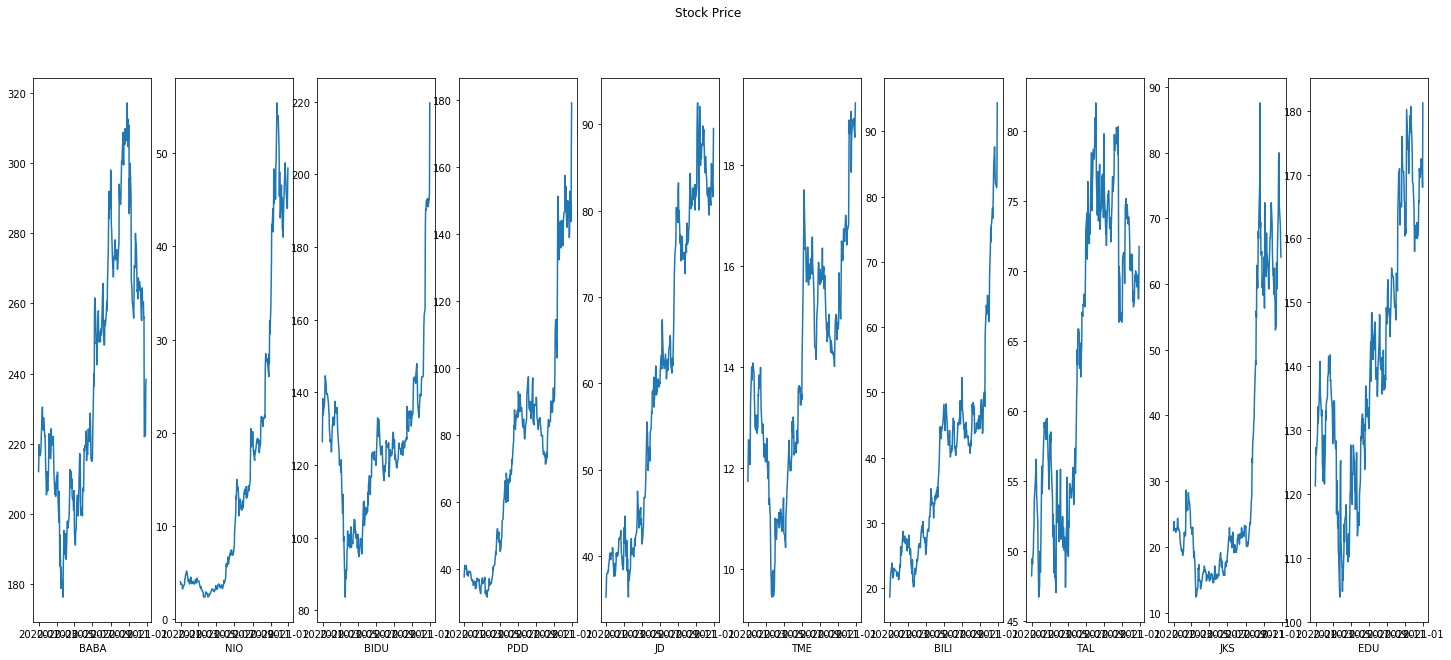

In [50]:
fig, ax = plt.subplots(1, 10, figsize=(25, 10))


plt.suptitle('Stock Price')
for i, name in enumerate(cn_stock.keys()):
    ax[i].plot(cn_stock[name].index, cn_stock[name].close)
    ax[i].set_xlabel(name)
#     ax[i]  = ax[i].twinx()
#     ax[i].plot(cn_stock[name].index, cn_stock[name].volume / 1e5, c='r')

plt.show()

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')


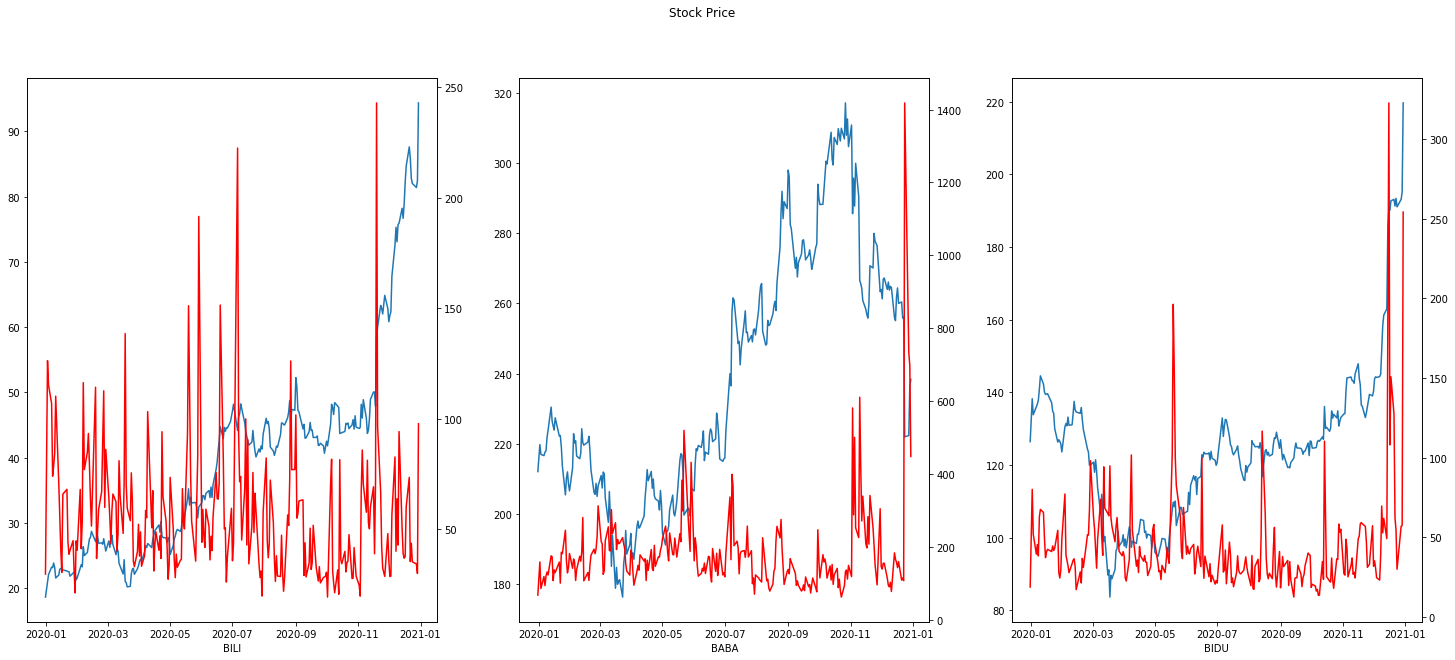

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(25, 10))

print(zgg['BABA'].columns)
# print(TSLA.index)
plt.suptitle('Stock Price')
for i, name in enumerate(zgg.keys()):
    ax[i].plot(zgg[name].index, zgg[name].close)
    ax[i].set_xlabel(name)
    ax[i]  = ax[i].twinx()
    ax[i].plot(zgg[name].index, zgg[name].volume / 1e5, c='r')

plt.show()

In [12]:
import pandas_datareader.data as web   
import datetime
start = datetime.datetime(2015,1,1)
end = datetime.date.today()
apple = web.DataReader("AAPL", "yahoo", start, end)

In [10]:
apple = web.DataReader("TSLA", "yahoo", start, end)

In [4]:
apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.380093
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.400942
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.789471
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.323915
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.339539
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.970001
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.690002
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.869995


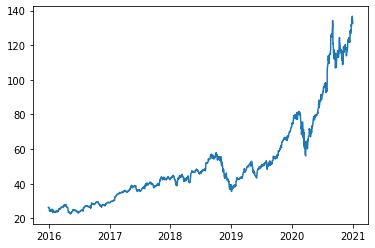

In [9]:
plt.plot(apple.index, apple.Close)

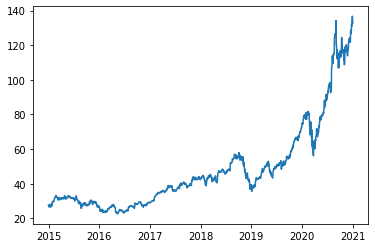

In [13]:
plt.plot(apple.index, apple.Close)

In [3]:
import pandas as pd


In [102]:
tmp = pd.read_table('renkou.txt',sep='\t', thousands=',',header=0)

In [103]:
tmp = tmp[-20:]

In [104]:
tmp = tmp[-20:]

In [105]:
tmp

,年份,年末总人口\n（万人）,出生数\n（万人）,死亡数\n（万人）,自然增长数\n（万人）,出生率(‰),死亡率(‰),自然增长率(‰)
51,2000,126743,1771.0,814.0,957.0,14.03,6.45,7.58
52,2001,127627,1702.0,818.0,884.0,13.38,6.43,6.95
53,2002,128453,1647.0,821.0,826.0,12.86,6.41,6.45
54,2003,129227,1599.0,825.0,774.0,12.41,6.40,6.01
55,2004,129988,1593.0,832.0,761.0,12.29,6.42,5.87
56,2005,130756,1617.0,849.0,768.0,12.40,6.51,5.89
57,2006,131448,1584.0,892.0,692.0,12.09,6.81,5.28
58,2007,132129,1594.0,913.0,681.0,12.10,6.93,5.17
59,2008,132802,1608.0,935.0,673.0,12.14,7.06,5.08
60,2009,133450,1591.0,943.0,648.0,11.95,7.08,4.87


In [106]:
  ax[i].plot(zgg[name].index, zgg[name].close)
    ax[i].set_xlabel(name)
    ax[i]  = ax[i].twinx()
    ax[i].plot(zgg[name].index, zgg[name].volume / 1e5, c='r')

IndentationError: unexpected indent (<ipython-input-106-c25f6a851cb4>, line 2)

In [107]:
import matplotlib.pyplot as plt

In [15]:
import numpy as np

In [108]:
tmp['年份'] = pd.to_datetime(tmp['年份'] , format='%Y')

In [109]:
tmp['年末总人口\n（万人）'] / 20

51    6337.15
52    6381.35
53    6422.65
54    6461.35
55    6499.40
56    6537.80
57    6572.40
58    6606.45
59    6640.10
60    6672.50
61    6704.55
62    6736.75
63    6770.20
64    6803.60
65    6839.10
66    6873.10
67    6913.55
68    6950.40
69    6976.90
70    7000.25
Name: 年末总人口\n（万人）, dtype: float64

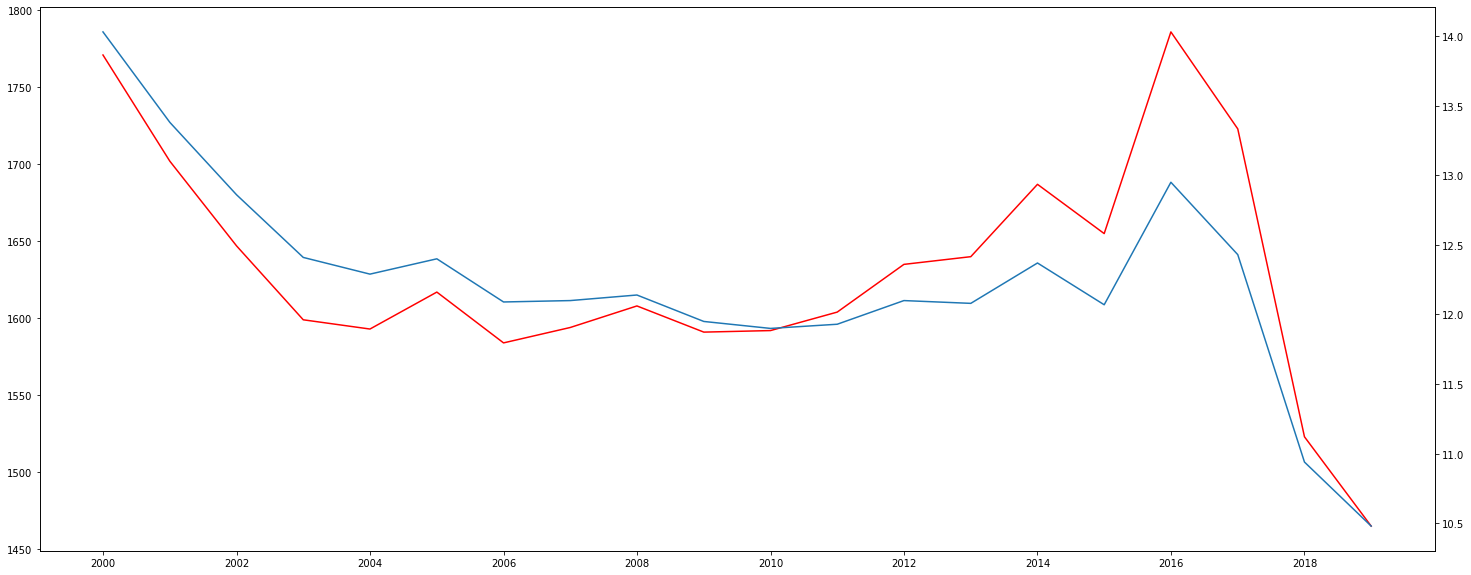

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
plt.plot(tmp['年份'], tmp['出生数\n（万人）'], c='r')
plt.twinx()

plt.plot(tmp['年份'], tmp['出生率(‰)'])
# plt.legend('f')

In [112]:
import seaborn as sns
sns.set()

In [95]:
import warnings
warnings.filterwarnings('ignore')

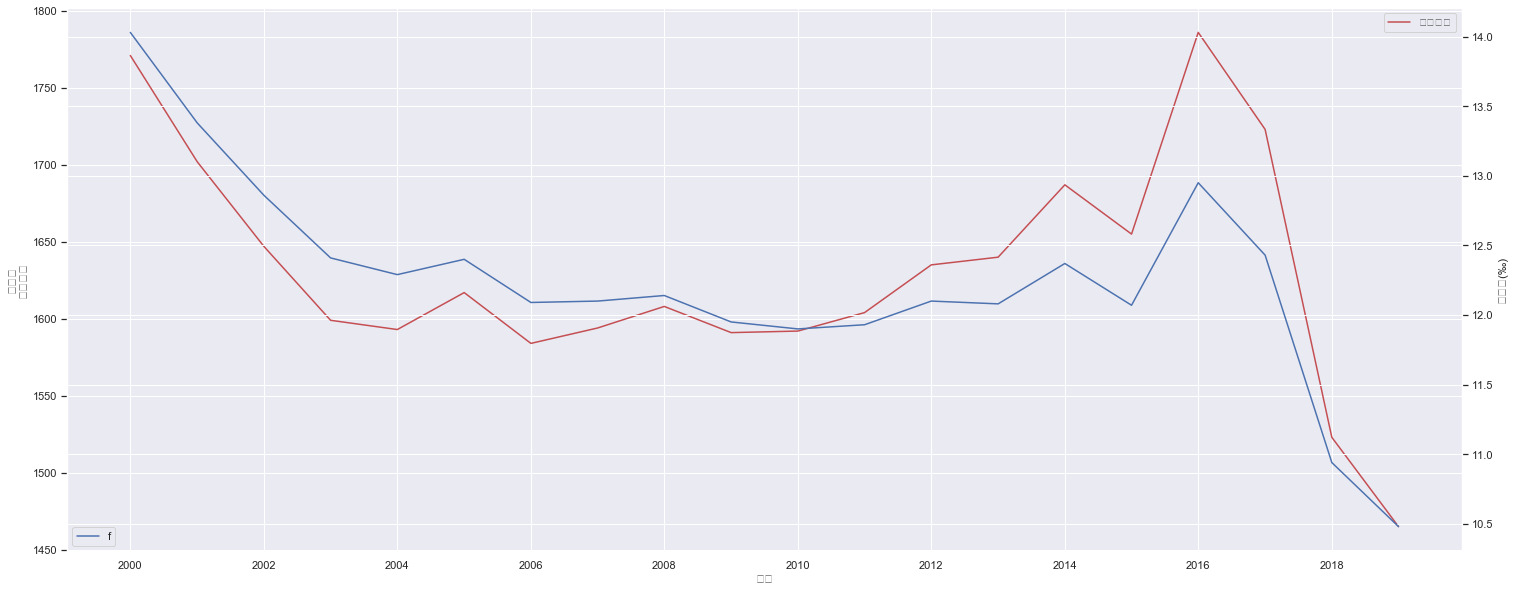

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.lineplot(tmp['年份'], tmp['出生数\n（万人）'], c='r', label='出生人口')
plt.twinx()

sns.lineplot(tmp['年份'], tmp['出生率(‰)'], label='出生率')
plt.legend(['f', 'f'],loc='lower left')

In [32]:

tmp['年末总人口\n（万人）']



ValueError: invalid literal for int() with base 10: '54,167'

In [25]:
np.log(tmp['年末总人口\n（万人）'])

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log method